# Question 2

### 2. What is the relationship between inadequate sleep duration and hypertension awareness among adults of the United States?

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('final_sample.csv')

# Selecting relevant columns for analysis
relevant_data = data[['X_state', 'sleptim1', 'bphigh4','sex']]

# Convert 'sleptim1' and 'bphigh4' to appropriate data types and handling any missing or invalid data
relevant_data['sleptim1'] = pd.to_numeric(relevant_data['sleptim1'], errors='coerce')
relevant_data['bphigh4'] = relevant_data['bphigh4'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else None)

# Summary statistics for sleep time and hypertension awareness
summary_sleep = relevant_data.groupby('X_state')['sleptim1'].mean()
summary_hypertension = relevant_data.groupby('X_state')['bphigh4'].mean()

C:\Users\lbarc\AppData\Local\Temp\ipykernel_8580\2309428842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['sleptim1'] = pd.to_numeric(relevant_data['sleptim1'], errors='coerce')
C:\Users\lbarc\AppData\Local\Temp\ipykernel_8580\2309428842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['bphigh4'] = relevant_data['bphigh4'].apply(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else None)


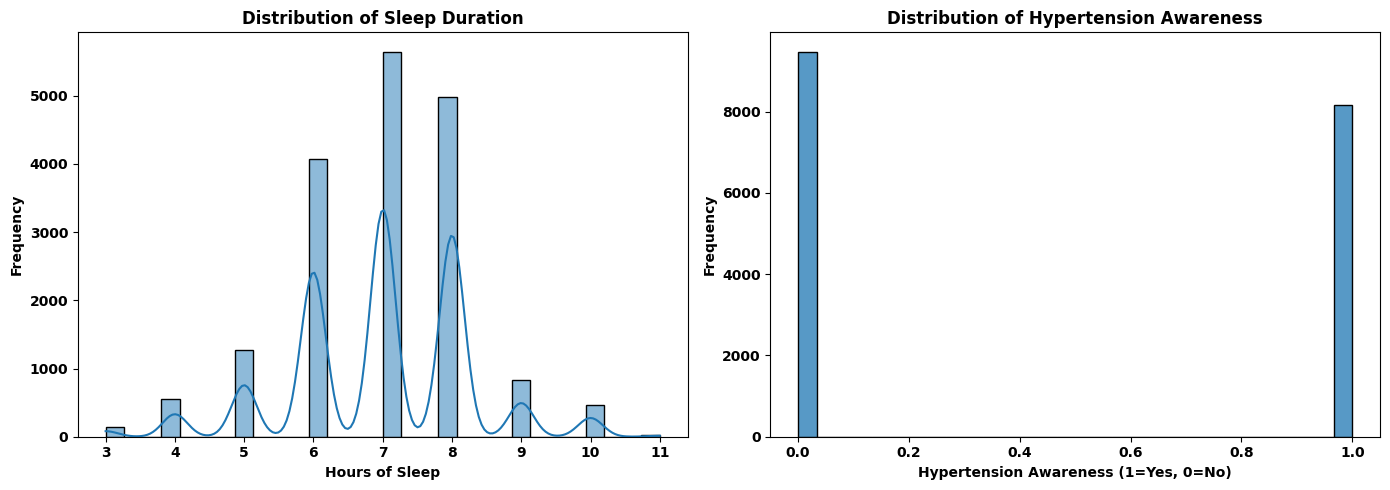

In [3]:
# Calculating summary statistics for sleep duration and hypertension awareness
summary_stats_sleep = relevant_data['sleptim1'].describe()
summary_stats_hypertension = relevant_data['bphigh4'].describe()

# Creating histograms for the distribution of sleep duration and hypertension awareness
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for sleep duration
sns.histplot(relevant_data['sleptim1'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Sleep Duration')
axes[0].set_xlabel('Hours of Sleep')
axes[0].set_ylabel('Frequency')

# Histogram for hypertension awareness
sns.histplot(relevant_data['bphigh4'].dropna(), bins=30, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Hypertension Awareness')
axes[1].set_xlabel('Hypertension Awareness (1=Yes, 0=No)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

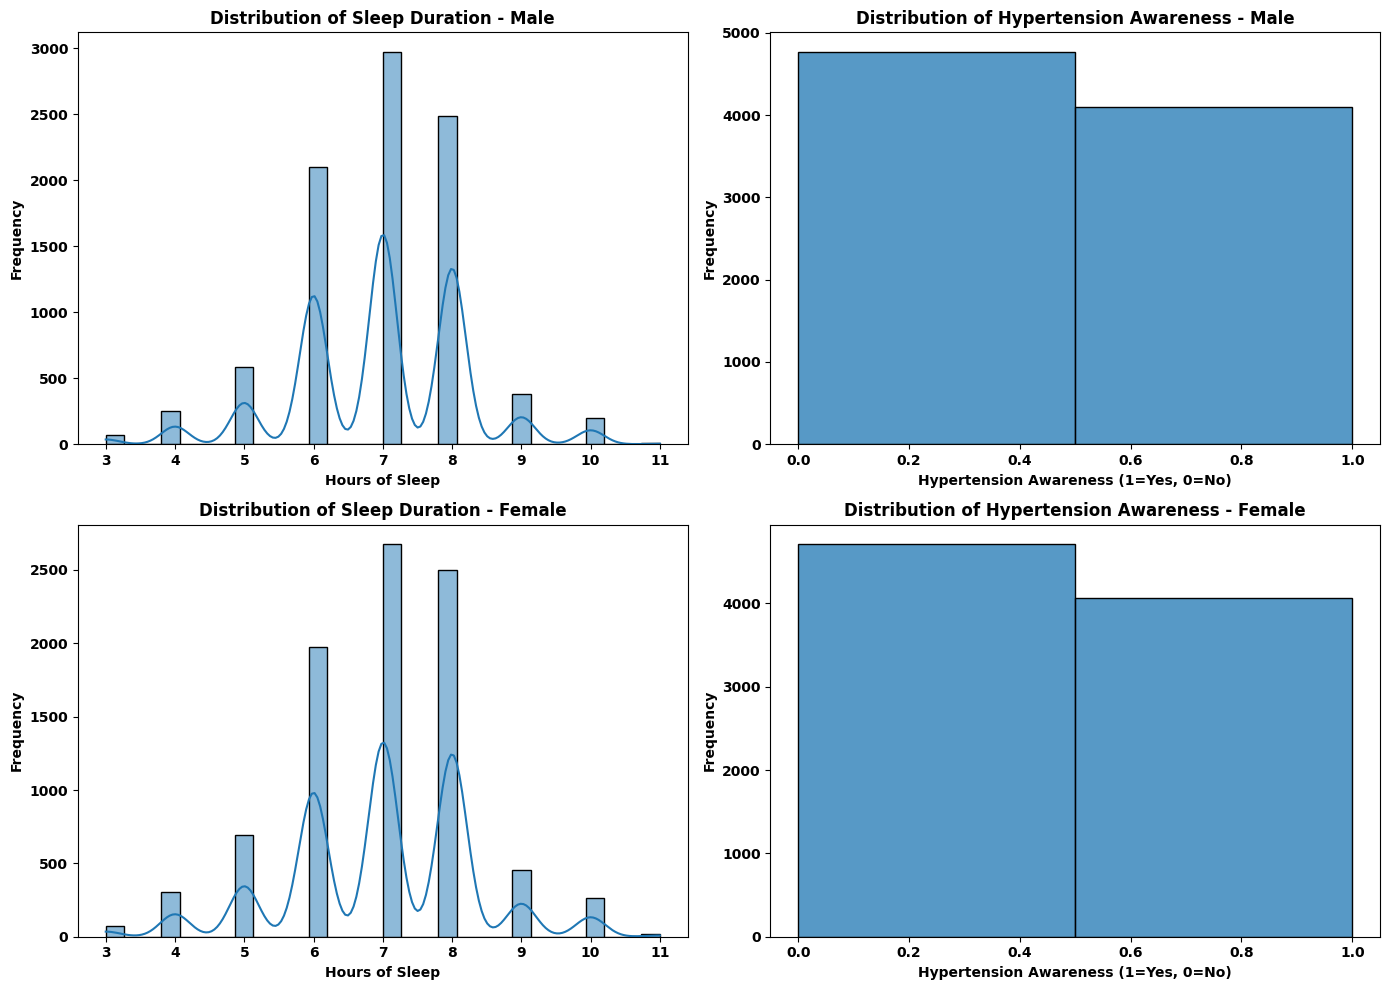

In [4]:
# Recalculate summary statistics by gender
summary_stats_gender = relevant_data.groupby('sex').agg({
    'sleptim1': ['mean', 'std', 'min', 'max', 'median'],
    'bphigh4': ['mean', 'std', 'count']
})

# Creating histograms for sleep duration and hypertension awareness by gender
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograms for sleep duration by gender
for i, gender in enumerate(['Male', 'Female']):
    sns.histplot(relevant_data[relevant_data['sex'] == gender]['sleptim1'], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of Sleep Duration - {gender}')
    axes[i, 0].set_xlabel('Hours of Sleep')
    axes[i, 0].set_ylabel('Frequency')

# Histograms for hypertension awareness by gender
for i, gender in enumerate(['Male', 'Female']):
    sns.histplot(relevant_data[relevant_data['sex'] == gender]['bphigh4'], bins=2, kde=False, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribution of Hypertension Awareness - {gender}')
    axes[i, 1].set_xlabel('Hypertension Awareness (1=Yes, 0=No)')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

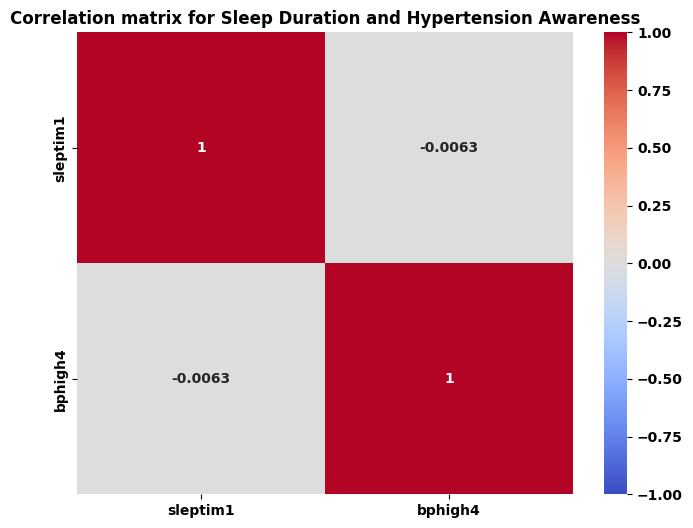

In [5]:
# Calcular la matriz de correlación
correlation_matrix = relevant_data[['sleptim1', 'bphigh4']].corr()

# Crear el corrplot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation matrix for Sleep Duration and Hypertension Awareness')
plt.show()

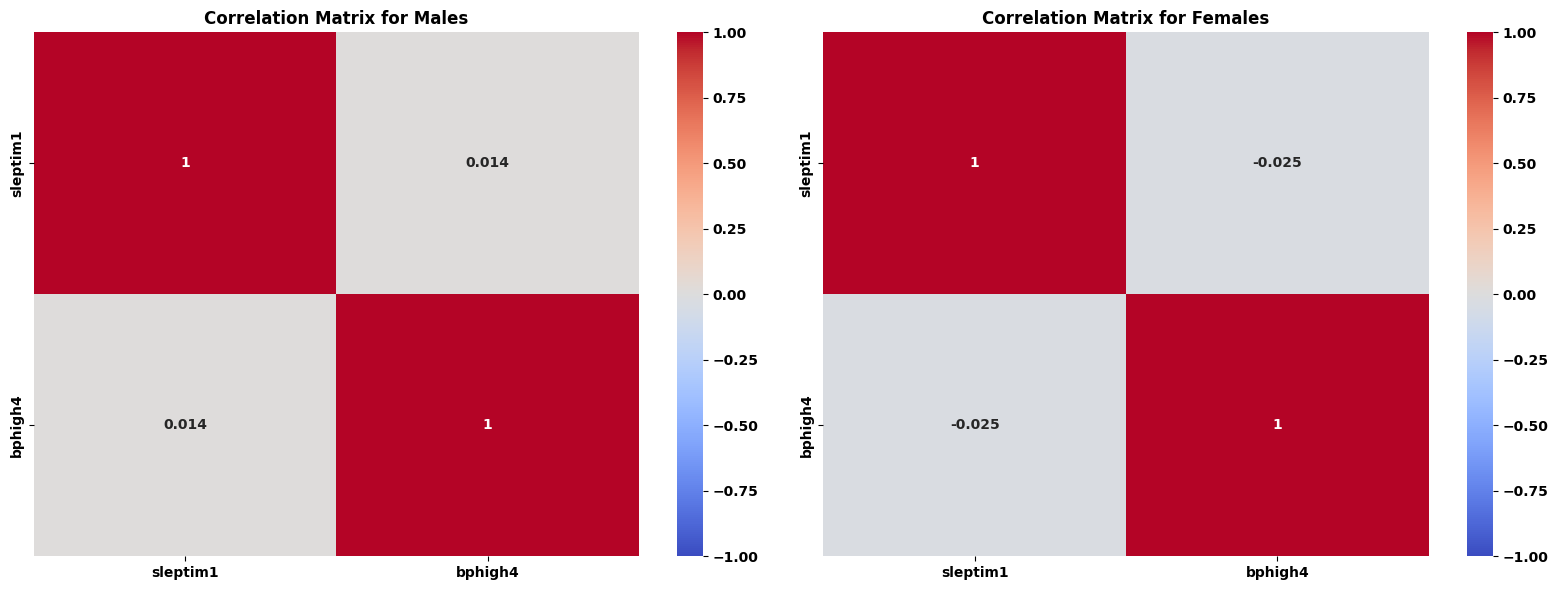

In [6]:
# Separar los datos por género
male_data = relevant_data[relevant_data['sex'] == 'Male'][['sleptim1', 'bphigh4']]
female_data = relevant_data[relevant_data['sex'] == 'Female'][['sleptim1', 'bphigh4']]

# Calcular la matriz de correlación para cada género
male_corr = male_data.corr()
female_corr = female_data.corr()

# Crear figuras para los corrplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Corrplot para hombres
sns.heatmap(male_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=axes[0])
axes[0].set_title('Correlation Matrix for Males')

# Corrplot para mujeres
sns.heatmap(female_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=axes[1])
axes[1].set_title('Correlation Matrix for Females')

plt.tight_layout()
plt.show()

Now we are going to group the slept time in 5 groups:


Less than 7 h "Low"

7 h "Middle"

More than 9 h "High"

In [7]:
bins = [0, 7, 8, float('inf')]
labels = ['Low', 'Middle', 'High']
relevant_data['sleep_group'] = pd.cut(relevant_data['sleptim1'], bins=bins, labels=labels, right=False)

C:\Users\lbarc\AppData\Local\Temp\ipykernel_8580\1127576687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data['sleep_group'] = pd.cut(relevant_data['sleptim1'], bins=bins, labels=labels, right=False)


Now i want to see if the 5 groups of slept time have the same average of bphigh4 (high blood pressure awareness)

In [8]:
data_sleep_experiment = relevant_data[['sleep_group', 'bphigh4']].copy()

data_sleep_experiment.head()

,sleep_group,bphigh4
0,Middle,0.0
1,Low,0.0
2,Middle,0.0
3,High,0.0
4,High,0.0


In [9]:
col_counts = data_sleep_experiment['sleep_group'].value_counts()
col_counts


High      6310
Low       6043
Middle    5647
Name: sleep_group, dtype: int64

## Populations

In [10]:
result = data_sleep_experiment.groupby(by = ['sleep_group']).sum()
result['bphigh4'] = result['bphigh4']/col_counts
result

,bphigh4
sleep_group,
Low,0.465663
Middle,0.427307
High,0.465293


### CI - 95%

In [12]:
z = 1.96
sep_bp = []
populations = result['bphigh4'].values
population_sizes = col_counts.values 


for i in range(len(populations)):
    population = populations[i]
    n = population_sizes[i]
    sep_bp.append(np.sqrt(population*(1-population)/n))

result['sep'] = sep_bp

In [13]:
result['min'] = result['bphigh4'] - z*result['sep']
result['max'] = result['bphigh4'] + z*result['sep']
result

,bphigh4,sep,min,max
sleep_group,,,,
Low,0.465663,0.006280,0.453355,0.477971
Middle,0.427307,0.006364,0.414834,0.439779
High,0.465293,0.006638,0.452283,0.478303


Following this approach we can say that there is a relation with 95% confidence, the difference of confidence intervals is significant.